In [0]:
import os,csv
from os import listdir
from os.path import isfile, join
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
from sklearn.model_selection import train_test_split # to split off training and test sets
from sklearn import preprocessing  # for standardizing the data
from sklearn import metrics  # Useful for creating confusion matrices
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf    # for creating neural networks
from tensorflow import keras   # an easier interface to work with than tensorflo

# Some useful functions we'll be needing later
Dense = keras.layers.Dense
Activation = keras.layers.Activation
to_categorical = keras.utils.to_categorical
Sequential = keras.Sequential


teams_csv = "/2018_teams.csv"
games_csv = "/2018_games.csv"

def create_team(columns, data):
    team = {}
    i = 0
    for column in data:
        column_title = str(columns[i])
        if i == 0:
            team[column_title] = column.lower()
        elif column_title == "division":
            team[column_title] = str(column).split(",")
        else:
            team[column_title] = float(column)
        i+=1
    team["schedule"] = []
    return team

def write_team(data, name):
    with open(name + ".pickle", 'w') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def open_all_teams():
    teams = {}
    for team in listdir("teams"):
        if ".pickle" in team:
            with open("teams/" + team, 'rb') as handle:
                data = pickle.load(handle)
                teams[data["team"]] = data
    return teams

def initialize_teams():
    with open(teams_csv) as teams:
        readCSV = csv.reader(teams, delimiter=',')
        columns = next(readCSV)
        database = {}
        for row in readCSV:
            team = create_team(columns, row)
            database[team["team"]] = team
        return database


def process_season(database):
    with open(games_csv) as games:
        readCSV = csv.reader(games, delimiter=',')
        columns = next(readCSV)
        for row in readCSV:
            w_dict = {"opponent":row[3].lower(),"home":True if int(row[2]) == 1 else False,"win":True,"points_for":float(row[4]),"points_allowed":float(row[5]),"yards_for":float(row[6]),"yards_allowed":float(row[8]),"turnovers_per_game":float(row[7]), "turnover_caused":float(row[9]), "penalty_yds_against":float(row[10]), "penalty_yds_help":float(row[11]), "time_of_possession":float(row[12]), "opposing_possession":float(row[13])}
            l_dict = {"opponent":row[1].lower(),"home":False if int(row[2]) == 1 else True,"win":False,"points_for":float(row[5]),"points_allowed":float(row[4]),"yards_for":float(row[8]),"yards_allowed":float(row[6]),"turnovers_per_game":float(row[9]), "turnover_caused":float(row[7]), "penalty_yds_help":float(row[11]), "penalty_yds_against":float(row[10]), "time_of_possession":float(row[13]), "opposing_possession":float(row[12])}
            database[row[1].lower()]["schedule"].append(w_dict)
            database[row[3].lower()]["schedule"].append(l_dict)
            
def process_season_whole():
    with open(games_csv) as games:
        readCSV = csv.reader(games, delimiter=',')
        columns = next(readCSV)
        database = []
        for row in readCSV:
            w_dict = {"winner_points_for":float(row[4]),"loser_points_for":float(row[5]),"winner_yards_for":float(row[6]),"winner":row[1].lower(),"loser":row[3].lower(),"loser_yards_for":float(row[8]), "winner_turnovers":float(row[7]), "loser_turnovers":float(row[9]), "winner_penalty_yds":float(row[10]), "loser_penalty_yds":float(row[11]), "winner_top":float(row[12]), "loser_top":float(row[13])}
            database.append(w_dict)
        return database
      
# database = initialize_teams()
# process_season(database)
data = pd.DataFrame.from_dict(process_season_whole())
data.info()
# raiders_schedule = pd.DataFrame.from_dict(data["rams"]["schedule"])
# corrmat = raiders_schedule.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=0.8, square=True)
# sns.set()
# columns = ["points_allowed","points_for","yards_allowed","yards_for"]
# sns.pairplot(raiders_schedule[columns], kind='scatter', diag_kind='kde')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 12 columns):
loser                 256 non-null object
loser_penalty_yds     256 non-null float64
loser_points_for      256 non-null float64
loser_top             256 non-null float64
loser_turnovers       256 non-null float64
loser_yards_for       256 non-null float64
winner                256 non-null object
winner_penalty_yds    256 non-null float64
winner_points_for     256 non-null float64
winner_top            256 non-null float64
winner_turnovers      256 non-null float64
winner_yards_for      256 non-null float64
dtypes: float64(10), object(2)
memory usage: 24.1+ KB


In [0]:
data.describe()

,loser_penalty_yds,loser_points_for,loser_top,loser_turnovers,loser_yards_for,winner_penalty_yds,winner_points_for,winner_top,winner_turnovers,winner_yards_for
count,256.000000,256.000000,256.00000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,59.593750,17.796875,1724.40625,1.804688,326.757812,55.339844,28.890625,1905.070312,0.914062,377.687500
std,31.091122,8.840956,239.86738,1.259060,91.434000,26.634007,8.592048,247.069624,0.986396,77.847387
min,0.000000,0.000000,1001.00000,0.000000,89.000000,0.000000,6.000000,1188.000000,0.000000,168.000000
25%,38.000000,12.000000,1550.75000,1.000000,265.000000,35.750000,23.000000,1729.500000,0.000000,325.000000
50%,54.000000,17.000000,1731.50000,2.000000,323.000000,52.000000,27.000000,1909.500000,1.000000,377.000000
75%,76.250000,23.000000,1891.25000,3.000000,391.250000,70.000000,34.000000,2077.000000,1.000000,427.000000
max,172.000000,51.000000,2412.00000,5.000000,576.000000,155.000000,54.000000,2733.000000,6.000000,576.000000


In [0]:
data.shape

(256, 12)

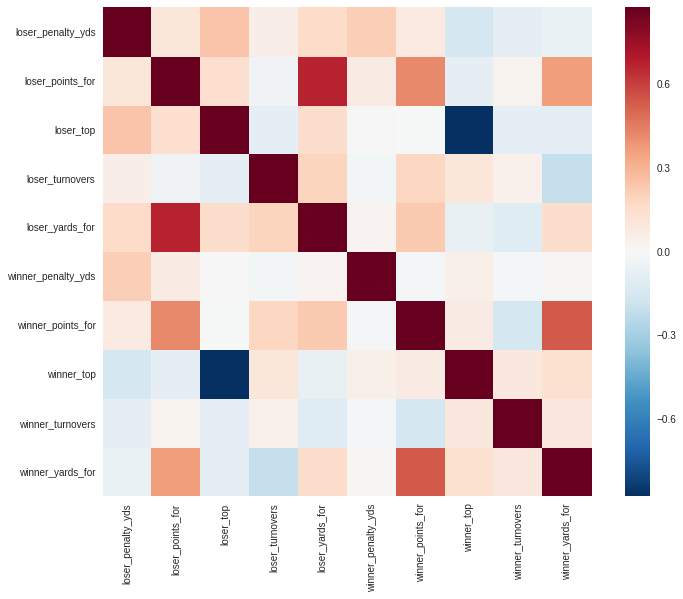

In [0]:
# Correlation Matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [0]:
data = data.drop(columns=['winner'])
data = data.drop(columns=['loser'])



```
Random Forest Stuff``` Winner



In [0]:
#Isolating winner_points_for from the rest of the columns
one = data.columns.tolist()[0:6]
two = data.columns.tolist()[7:]
#three = data.columns.tolist()[2:5]
cols = one + two
X = data[cols]
y = data['winner_points_for']  

# This library will help us randomly split our data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [0]:
labels = np.array(data['winner_points_for'])

features= data.drop('winner_points_for', axis = 1)


# Saving feature names for later use
feature_list = list(data.columns)
for i in range(len(feature_list)):
  print (feature_list[i])
# Convert to numpy array
features = np.array(data)

loser_penalty_yds
loser_points_for
loser_top
loser_turnovers
loser_yards_for
winner_penalty_yds
winner_points_for
winner_top
winner_turnovers
winner_yards_for


In [0]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (204, 9)
Training Labels Shape: (204,)
Testing Features Shape: (52, 9)
Testing Labels Shape: (52,)


In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10000, random_state = 300)
# Train the model on training data
rf.fit(X_train, y_train);

print('Training set R^2 =', rf.score(X_train, y_train))
print('Test set R^2 =', rf.score(X_test, y_test))

Training set R^2 = 0.9161430128639565
Test set R^2 = 0.49497937770139766


In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list.remove('winner_points_for'), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [0]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [0]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: winner_yards_for     Importance: 0.36
Variable: loser_points_for     Importance: 0.17
Variable: loser_turnovers      Importance: 0.09
Variable: loser_yards_for      Importance: 0.09
Variable: loser_penalty_yds    Importance: 0.07
Variable: winner_penalty_yds   Importance: 0.07
Variable: loser_top            Importance: 0.05
Variable: winner_top           Importance: 0.05
Variable: winner_turnovers     Importance: 0.05


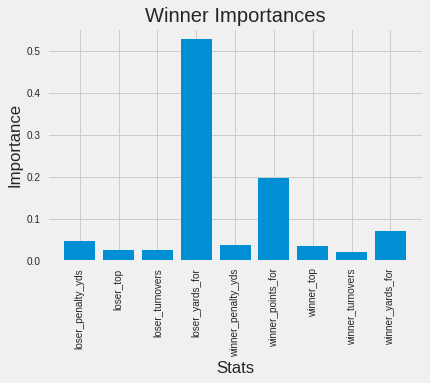

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Stats'); plt.title('Winner Importances');

End of Random Forest

RandomForest Loser points for

In [0]:
#Isolating winner_points_for from the rest of the columns
one = data.columns.tolist()[0:1]
two = data.columns.tolist()[2:]
#three = data.columns.tolist()[2:5]
cols = one + two
X = data[cols]
y = data['loser_points_for']  

# This library will help us randomly split our data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

labels = np.array(data['loser_points_for'])

features= data.drop('loser_points_for', axis = 1)
# Saving feature names for later use
feature_list = list(data.columns)
for i in range(len(feature_list)):
  print (feature_list[i])
# Convert to numpy array
features = np.array(data)

loser_penalty_yds
loser_points_for
loser_top
loser_turnovers
loser_yards_for
winner_penalty_yds
winner_points_for
winner_top
winner_turnovers
winner_yards_for


In [0]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (204, 9)
Training Labels Shape: (204,)
Testing Features Shape: (52, 9)
Testing Labels Shape: (52,)


In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

print('Training set R^2 =', rf.score(X_train, y_train))
print('Test set R^2 =', rf.score(X_test, y_test))

Training set R^2 = 0.9389988735639693
Test set R^2 = 0.5768919033562687


In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list.remove('loser_points_for'), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('loser.png')

In [0]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('loser_small_tree.png');

In [0]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: loser_yards_for      Importance: 0.53
Variable: winner_points_for    Importance: 0.2
Variable: winner_yards_for     Importance: 0.07
Variable: loser_penalty_yds    Importance: 0.05
Variable: winner_penalty_yds   Importance: 0.04
Variable: winner_top           Importance: 0.04
Variable: loser_top            Importance: 0.03
Variable: loser_turnovers      Importance: 0.03
Variable: winner_turnovers     Importance: 0.02


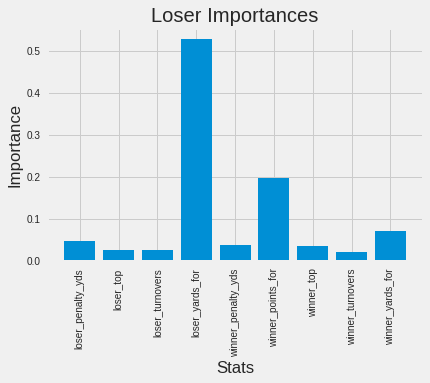

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Stats'); plt.title('Loser Importances');

End of random Forest

In [0]:
# X holds the data we'll use to predict the labels y.
X_train.head()

,loser_penalty_yds,loser_points_for,loser_top,loser_turnovers,loser_yards_for,winner_penalty_yds,winner_top,winner_turnovers,winner_yards_for
215,90.0,13.0,1601.0,0.0,313.0,85.0,1999.0,0.0,312.0
99,59.0,23.0,1601.0,1.0,305.0,35.0,1999.0,4.0,456.0
25,43.0,12.0,1639.0,3.0,362.0,53.0,1961.0,2.0,257.0
84,30.0,3.0,1504.0,2.0,185.0,69.0,2096.0,1.0,369.0
93,45.0,10.0,1751.0,5.0,223.0,50.0,1849.0,1.0,309.0


In [0]:
# y holds the corresponding labels.
y_train.head()

215    14.0
99     26.0
25     20.0
84     27.0
93     45.0
Name: winner_points_for, dtype: float64

**Oof**

In [0]:
from sklearn import linear_model

# This next line defines a linear model that still must be fit to our training data.
lm = linear_model.LinearRegression()
# Fitting our data to the model is now easy!
model = lm.fit(X_train, y_train)

# Let's examine this model.

# How well does our model predict the known labels in our training and test sets?
print('Training set R^2 =', lm.score(X_train, y_train))
print('Test set R^2 =', lm.score(X_test, y_test))

Training set R^2 = 0.5099422379427512
Test set R^2 = 0.5123189012234735


New Stuff Rob Made

In [0]:
import pickle
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing  # for standardizing the data
import pandas as pd
import seaborn as sns      # visualization tool
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf    # for creating neural networks
from tensorflow import keras   # an easier interface to work with than tensorflow
import matplotlib.pyplot as plt
from keras.utils import plot_model

#plot_model(model, to_file='model.png')

def openAllTeamsFromSeason(season):
    with open("/teams" + str(season) + ".pickle", 'rb') as handle:
        data = pickle.load(handle)
        return data

def openTeamFromSeason(team,season):
    with open("/teams" + str(season) + ".pickle", 'rb') as handle:
        data = pickle.load(handle)
        return data[team]

def openSeason(season):
    with open("/season" + str(season) + ".pickle", 'rb') as handle:
        data = pickle.load(handle)
        return data
      
def allStats(team):
    return list(team.values())
      
def getStat(team,stat):
    return float(team[stat])
      
def calculate(team):
    #['g', 'points', 'total_yards', 'plays_offense', 'yds_per_play_offense',
    #'turnovers', 'fumbles_lost', 'first_down', 'pass_cmp', 'pass_att', 'pass_yds',
    #'pass_td', 'pass_int', 'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds',
    # 'rush_td', 'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
    #'score_pct', 'turnover_pct', 'exp_pts_tot'])
    exp = float(team["exp_pts_tot"])
    return exp      

Dense = keras.layers.Dense
Activation = keras.layers.Activation
to_categorical = keras.utils.to_categorical
Sequential = keras.Sequential
# scrape.scrapeWeeklyResults()

full_table = []
x_train = []
y_train = []
x_test = []
y_test = []

for i in range(2000,2019):
    teams_for_year = openAllTeamsFromSeason(i)
    head_to_head = openSeason(i)
    for game in head_to_head:
        winner = teams_for_year[game[0]]
        loser = teams_for_year[game[1]]
        # w_value =
        # l_value =
        # print(winner["pass_net_yds_per_att"],loser["pass_net_yds_per_att"])
        if i <= 2017:
            if game[2] == 1:
                # AWAY WIN
                
                x_train.append([getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense"),getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense")])
                y_train.append(1)
            else:
                 x_train.append([getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense"),getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense")])
                 y_train.append(0)
        else:
            if game[2] == 1:
                #AWAY WIN
                 x_test.append([getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense"),getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense")])
                 y_test.append(1)
            else:
                 x_test.append([getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense"),getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense")])
                 y_test.append(0)
        # if game[2] == 1:
        #     # AWAY WIN
            # y_values.append(0)
        # else:

        

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
X_train = [204, None]
rf.fit(X_train, y_train);

print('Training set R^2 =', rf.score(X_train, y_train))
print('Test set R^2 =', rf.score(X_test, y_test))

ValueError: ignored